-> Chargement des librairies et fonctions

// Ici je retest tout avec les 10 topic majoritaire par et le titre

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True     500
False    500
Name: our rating, dtype: int64


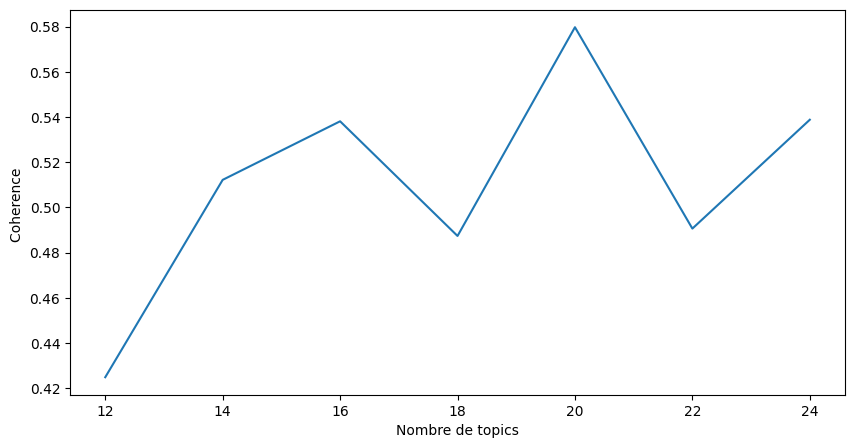

Affichage des  21  différents topics pour le corpus BOW :

Topic: 0 Word: 0.001*"say" + 0.001*"walker" + 0.001*"president" + 0.001*"campaign" + 0.001*"county executive" + 0.001*"run" + 0.001*"former vice" + 0.001*"county" + 0.001*"house" + 0.001*"stone" + 0.001*"schedule" + 0.001*"ally" + 0.001*"business" + 0.001*"speak" + 0.001*"stone say" + 0.001*"go" + 0.001*"way" + 0.001*"job" + 0.001*"think" + 0.001*"keep" + 0.001*"bad advice" + 0.001*"democratic" + 0.001*"hold" + 0.001*"year" + 0.001*"peter" + 0.001*"election" + 0.001*"get" + 0.001*"include" + 0.001*"make" + 0.001*"want" + 0.001*"biden" + 0.001*"candidate" + 0.001*"people" + 0.001*"need" + 0.001*"former" + 0.001*"even" + 0.001*"reduce" + 0.001*"begin" + 0.001*"report" + 0.001*"also" + 0.001*"cost" + 0.001*"executive" + 0.001*"country" + 0.001*"politico" + 0.001*"announce" + 0.001*"border" + 0.001*"talk" + 0.001*"day" + 0.001*"post" + 0.001*"die probably"
Topic: 1 Word: 0.001*"say" + 0.001*"walker" + 0.001*"county executive" + 0.0

,topic_dominant,pourcentage_contrib,topic_keywords,text
0,7,0.9903,"windrush generation, house, action, take, ensu...",It is absolutely right that across this House ...
1,15,0.9951,"health, coal miner, black lung, miner, amendme...",Manchin and Capito Introduce Legislation to Im...
2,17,0.9960,"report, mandel, trust, say, wife, hold, show, ...","WASHINGTON, D.C. — Ohio Treasurer Josh Mandel,..."
3,18,0.9940,"price, gas, say, low, taxis, home, demand, new...","BUFFALO, N.Y. WKBW — As people stay home to he..."
4,3,0.9877,"walker, county, county executive, say, stone s...",SHARE By of the Republican state Rep. Jeff S...
5,5,0.9925,"vote, happen, get, people, know, least, year, ...","Her name is Taylor Zundel, and it sounds like ..."
6,16,0.9947,"say, campaign, former vice, president, schedul...",Nearly one million people have died from CoVID...
7,6,0.9879,"year, railway, increase, passenger, today, sin...","Figures released today, the 25th anniversary o..."
8,11,0.9980,"peter, get, politico, think, say, border, busi...",Border politics: San Diego Democrat Peters say...
9,9,0.9971,"rise, ticket, go, rpi, pension, commuter, expe...",Get ready for another big rise in train fares....


In [5]:
# fonctions utilities (affichage, confusion, etc.)
from Fonction.MyNLPUtilities import *
# fonctions utilities (fonction de clean, import etc etc)
from Fonction.myFonction import *

from Fonction.AllModels import *
# librairies de gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import corpora
from gensim import models

import re
import spacy
import gensim
import string
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import gensim
from gensim.utils import simple_preprocess
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import corpora
from gensim import models
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
#nlp = spacy.load('en', disable=['parser', 'ner'])

def MyCleanTextsforLDA(texts,
                       min_count=1, # nombre d'apparitions minimale pour un bigram
                       threshold=2,
                       no_below=1, # nombre minimum d'apparitions pour être dans le dictionnaire
                       no_above=0.5, # pourcentage maximal (sur la taille totale du corpus) pour filtrer
                       stop_words=stop_words
                       ):

    allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
    sentences=texts.copy()

    # suppression des caractères spéciaux
    sentences = [re.sub(r'[^\w\s]', ' ', str(sentence)) for sentence in sentences]
    # suppression de tous les caractères uniques
    sentences = [re.sub(r'\s+[a-zA-Z]\s+', ' ', str(sentence)) for sentence in sentences]
    # substitution des espaces multiples par un seul espace
    sentences = [re.sub(r'\s+', ' ', str(sentence), flags=re.I) for sentence in sentences]

    # conversion en minuscule et split des mots dans les textes
    sentences = [sentence.lower().split() for sentence in sentences]

    # utilisation de spacy pour ne retenir que les allowed_postags
    texts_out = []
    for sent in sentences:
        if len(sent) < (nlp.max_length): # si le texte est trop grand
            doc = nlp(" ".join(sent))
            texts_out.append(" ".join([token.lemma_ for token in doc if token.pos_ in allowed_postags]))
        else:
            texts_out.append(sent)
    sentences=texts_out

    # suppression des stopwords
    words =[[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in sentences]


    # recherche des bigrammes
    bigram = Phrases(words, min_count, threshold,delimiter=' ')
    bigram_phraser = Phraser(bigram)


    # sauvergarde des tokens et des bigrammes
    bigram_token = []
    for sent in words:
        bigram_token.append(bigram_phraser[sent])


    # creation du vocabulaire
    dictionary = gensim.corpora.Dictionary(bigram_token)


    # il est possible de filtrer des mots en fonction de leur occurrence d'apparitions
    #dictionary.filter_extremes(no_below, no_above)
    # et de compacter le dictionnaire
    # dictionary.compactify()
    corpus = [dictionary.doc2bow(text) for text in bigram_token]

    # recuperaction du tfidf plutôt que uniquement le bag of words
    tfidf = models.TfidfModel(corpus)
    corpus_tfidf = tfidf[corpus]

    return corpus, corpus_tfidf, dictionary, bigram_token



def get_best_coherence_values(corpus, dictionary, listtokens, start=5, stop=15, step=2):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics,
                                               random_state=100,
                                               chunksize=100,
                                               passes=10,
                                               per_word_topics=True)

        coherence_model_lda = CoherenceModel(model=lda_model, texts=listtokens, dictionary=dictionary, coherence='c_v')
        model_list.append(lda_model)
        coherence_values.append(coherence_model_lda.get_coherence())
    return model_list, coherence_values

def format_topics_sentences(ldamodel, corpus, texts):
    # Initialisation du dataframe de sortie
    sent_topics_df = pd.DataFrame()

    # Recherche le topic dominant pour chaque document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list

        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Donne le topic dominant, le pourcentage de contribution
        # et les mots clés pour chaque document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => topic dominant
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['topic_dominant', 'pourcentage_contrib', 'topic_keywords']

    # Ajout du texte original à la fin de la sortie
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

data_brute = pd.read_csv('./Data_equilibre/balanced_concat.csv', sep=",")


data_brute = data_brute.drop_duplicates()
print(data_brute['our rating'].value_counts())

data_brute = data_brute.head(10)

stop = stopwords.words('english')


corpus_all, corpus_tfidf_all, dictionary_all, bigram_token_all=MyCleanTextsforLDA(data_brute.text)


model_list, coherence_values = get_best_coherence_values(dictionary=dictionary_all,
                                                         corpus=corpus_all,
                                                         listtokens=bigram_token_all,
                                                         start=12, stop=25, step=2)

# affichage du graphe associé à la recherche du nombre de topics
plt.figure(figsize=(10,5))
x = range(12, 25, 2)
plt.plot(x, coherence_values)
plt.xlabel("Nombre de topics")
plt.ylabel("Coherence ")
#plt.legend(("Valeurs de cohérencescoherence_values"), loc='best')
plt.show()


num_topics=21 # nombre de topics
num_words=50 # nombre de mots par topics


lda_model_all = gensim.models.ldamulticore.LdaMulticore(
    corpus=corpus_all,
    num_topics=num_topics,
    id2word=dictionary_all,
    chunksize=100,
    workers=7,
    passes=10,
    random_state=100,
    eval_every = 1,
    per_word_topics=True)


print ("Affichage des ",num_topics," différents topics pour le corpus BOW :\n")
for idx, topic in lda_model_all.print_topics(-1,num_words):
    print('Topic: {} Word: {}'.format(idx, topic))




df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model_all, corpus=corpus_all, texts=data_brute.text)


display(df_topic_sents_keywords)

In [8]:
print(df_topic_sents_keywords.iloc[3].topic_keywords)
print(df_topic_sents_keywords.iloc[3].text.len)

price, gas, say, low, taxis, home, demand, new yorker, gallon gas, gas price
BUFFALO, N.Y. WKBW — As people stay home to help stop the spread of the coronavirus, the price of gas has slowly started to drop.  But in New York State, that’s not saying much.  That’s because New York is one of only 12 states where the average gallon of gas costs more than $2.00, according to numbers provided by the AAA of Western and Central New York.  Nationally, the average price of a gallon of gas is $1.77, compared to $2.89 a year ago.  In New York State, it's $2.18 per gallon, compared to $2.96 a year ago.  In Buffalo, gas is now $2.23 per gallon, compared to $2.88 a year ago.  “The oil prices have a direct impact on what we pay at the pump, so with these low oil prices and this low demand for gasoline right now, we're just seeing gas prices drop,” said Elizabeth Carey, spokeswoman for the AAA.  Oil demand first started to drop in China, she said, and government directives for the coronavirus now have 